In [ ]:
# Supplementary Figure 5, 6, 7, 8.


In [33]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, norm
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load Clinical Data

df_clinical = pd.read_csv("clinical.csv")

In [50]:
# load data to use in analysis

df_npq =  pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="NPQ_and_SIMOA_Data")


In [51]:
# Build mapping dict for Mapping Target Names to be used in paper
df_target_names = pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="Target Name")
mapping = dict(zip(df_target_names["Target Name on NULISAseq™ CNS Disease Panel "], df_target_names["Target Name used in the paper"]))

# Rename columns
df_npq = df_npq.rename(columns=mapping)

In [52]:
# merge clinical and biomarker data

df_merged = pd.merge(df_clinical, df_npq, on = "sample_barcode", how = "inner")

In [45]:
# Define function to calculate Spearman's r, p value and and 95% confidence interval

def calculate_spearman_ci(x, y, alpha=0.05):
    r, p_value = spearmanr(x, y)
    n = len(x)
    if n < 3:
        raise ValueError("Need at least 3 observations for confidence interval calculation")
    
    z = np.arctanh(r)  # Fisher's Z transformation
    se = 1.0 / np.sqrt(n - 3)
    z_lower, z_upper = z - 1.96 * se, z + 1.96 * se
    
    r_lower, r_upper = np.tanh((z_lower, z_upper))
    return r, p_value, r_lower, r_upper


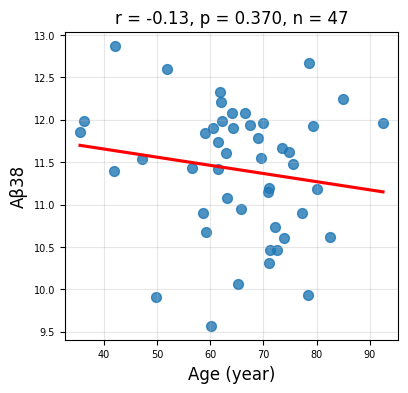

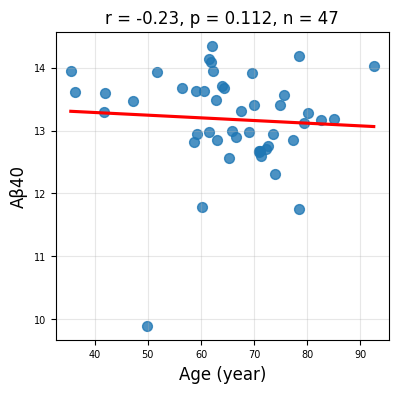

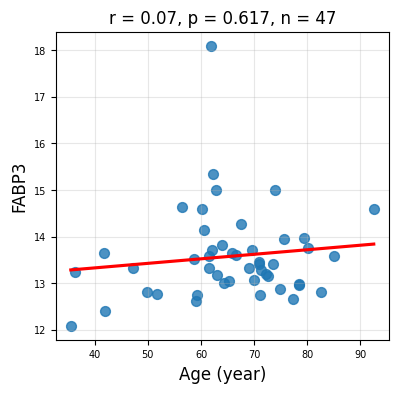

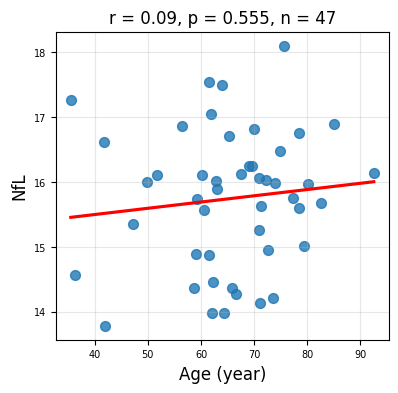

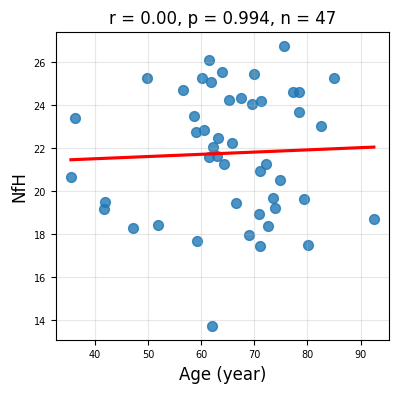

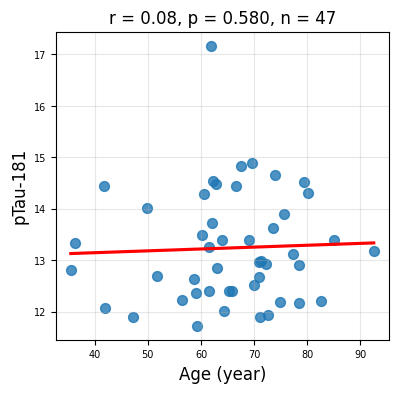

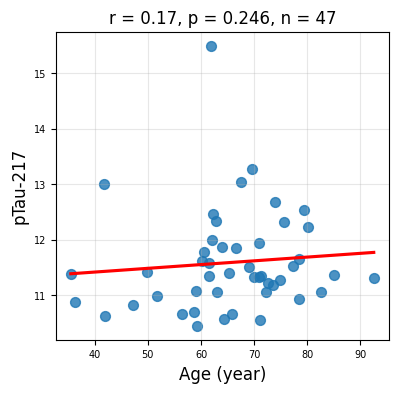

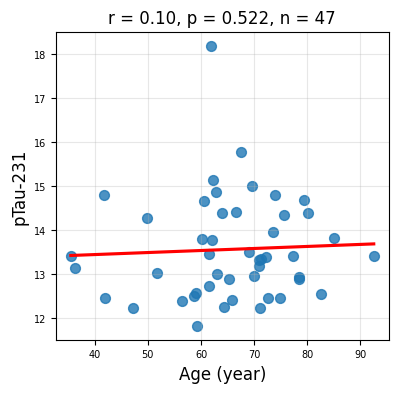

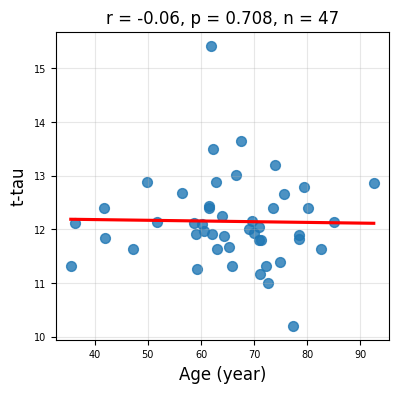

In [58]:


# Select nine significant markers 
df = df_merged[["Age (year)", "Aβ38", "Aβ40",  "FABP3", "NfL", "NfH", "pTau-181", "pTau-217", "pTau-231", "t-tau"]]

# Fixed X column
x_col = "Age (year)"


# Filter only numeric columns for Y (excluding the X column)
numeric_cols = df.select_dtypes(include='number').columns.drop(x_col, errors='ignore')

results = []

# Loop through numeric Y columns
for y_col in numeric_cols:
    # Drop rows with missing values for the two columns
    valid_data = df[[x_col, y_col]].dropna()
    
    # Skip if no variation
    if valid_data[y_col].nunique() < 2 or valid_data[x_col].nunique() < 2:
        print(f"Skipping {y_col}: Not enough variation")
        continue

    # Calculate Spearman correlation and confidence interval
    corr, p_value, r_lower, r_upper = calculate_spearman_ci(valid_data[x_col], valid_data[y_col])
    n = len(valid_data)
    
    # Append results
    results.append({
        'Marker': y_col,
        'Spearman_r': corr,
        'p_value': p_value,
        'CI_lower': r_lower,
        'CI_upper': r_upper,
        'Sample_size': n
    })

    # Plot scatter
    plt.figure(figsize=(4.3, 4))
    sns.regplot(x=valid_data[x_col], y=valid_data[y_col], ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
    plt.title(f"r = {corr:.2f}, p = {p_value:.3f}, n = {n}", fontsize = 12)
    plt.xlabel(x_col, fontsize =12)
    plt.ylabel(y_col, fontsize =12)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.grid(alpha=0.3)
    plt.savefig(f".\\figures\\Age_vs{y_col}.tiff", dpi=300)
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
results_df

# #  export results to CSV
results_df.to_csv('age_spearman_results.csv', index=False)




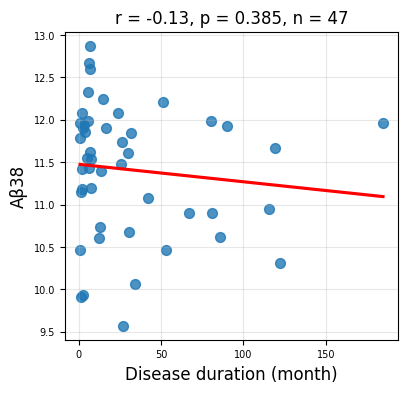

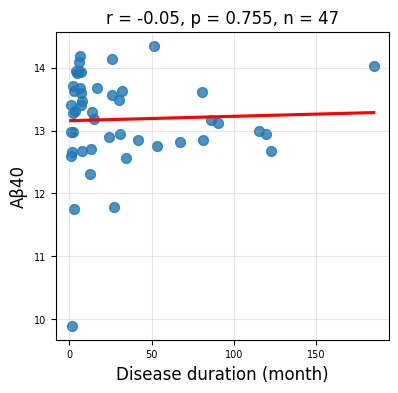

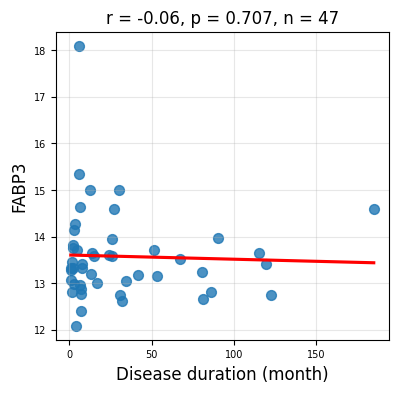

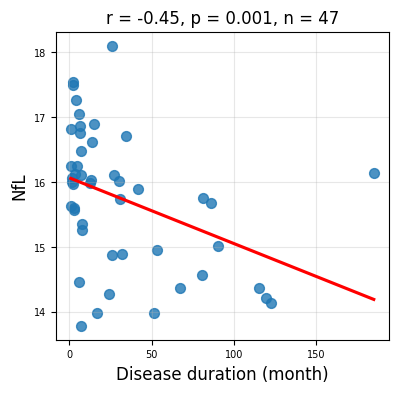

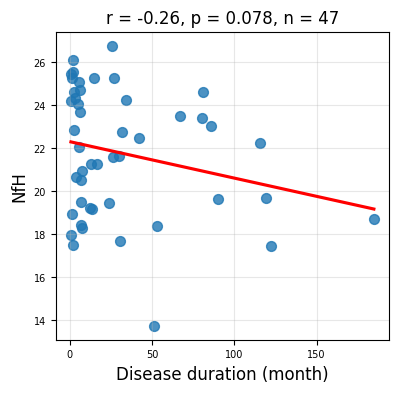

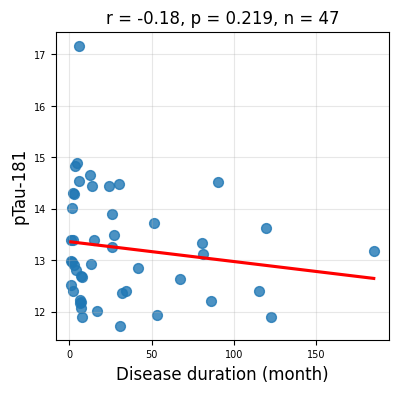

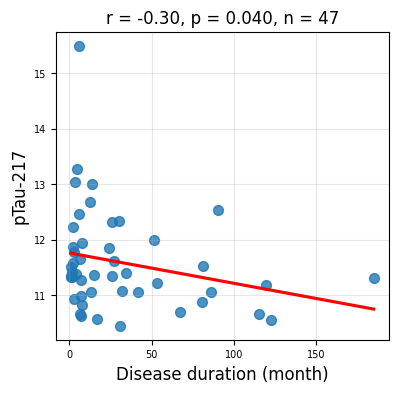

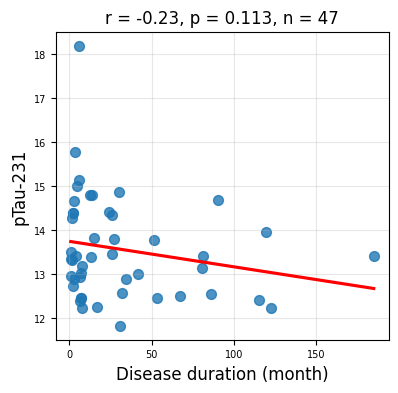

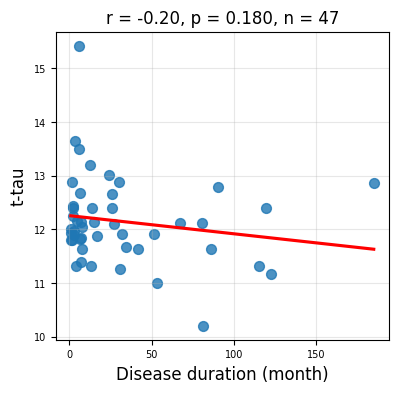

In [59]:
# Disease duration from diagnosis (month) vs Markers 

# Select nine significant markers 
df = df_merged[["Disease duration (month)", "Aβ38", "Aβ40",  "FABP3", "NfL", "NfH", "pTau-181", "pTau-217", "pTau-231", "t-tau"]]


# Fixed X column
x_col = "Disease duration (month)"


# Filter only numeric columns for Y (excluding the X column)
numeric_cols = df.select_dtypes(include='number').columns.drop(x_col, errors='ignore')


results = []

# Loop through numeric Y columns
for y_col in numeric_cols:
    # Drop rows with missing values for the two columns
    valid_data = df[[x_col, y_col]].dropna()
    
    # Skip if no variation
    if valid_data[y_col].nunique() < 2 or valid_data[x_col].nunique() < 2:
        print(f"Skipping {y_col}: Not enough variation")
        continue

    # Calculate Spearman correlation and confidence interval
    corr, p_value, r_lower, r_upper = calculate_spearman_ci(valid_data[x_col], valid_data[y_col])
    n = len(valid_data)
    
    # Append results
    results.append({
        'Marker': y_col,
        'Spearman_r': corr,
        'p_value': p_value,
        'CI_lower': r_lower,
        'CI_upper': r_upper,
        'Sample_size': n
    })

    # Plot scatter
    plt.figure(figsize=(4.3, 4))
    sns.regplot(x=valid_data[x_col], y=valid_data[y_col], ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
    plt.title(f"r = {corr:.2f}, p = {p_value:.3f}, n = {n}",  fontsize = 12)
    plt.xlabel(x_col, fontsize =12)
    plt.ylabel(y_col, fontsize =12)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.grid(alpha=0.3)
    plt.savefig(f".\\figures\\DiseaseDuration_vs{y_col}.tiff", dpi=300)
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
results_df

# #  export results to CSV
results_df.to_csv('dd_spearman_results.csv', index=False)


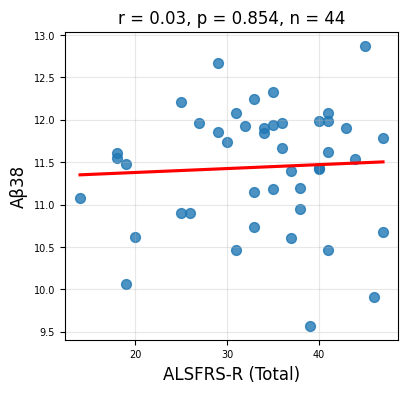

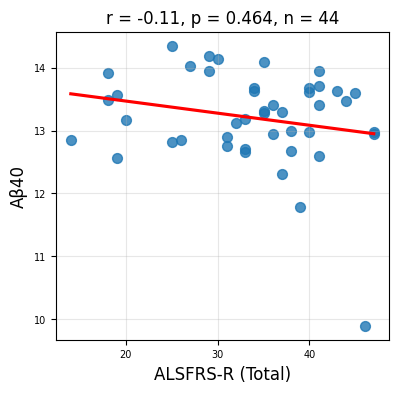

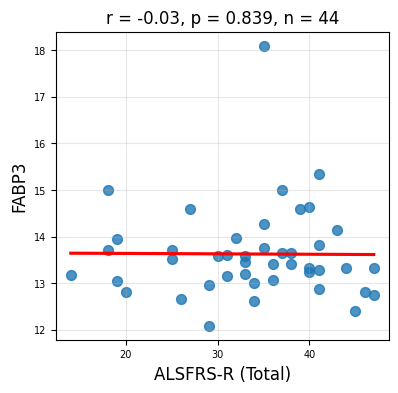

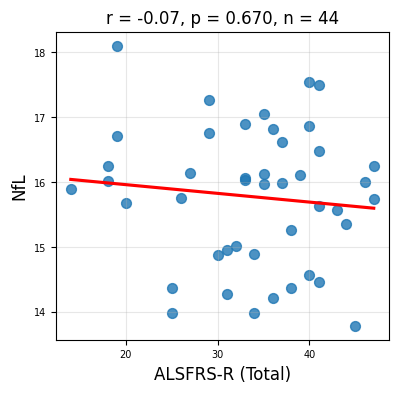

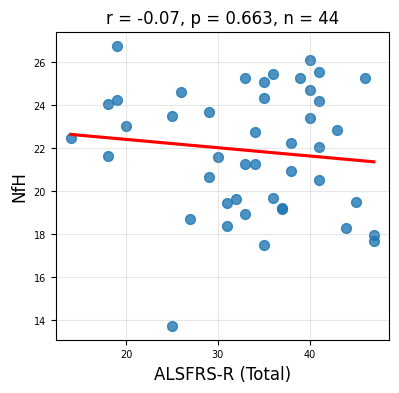

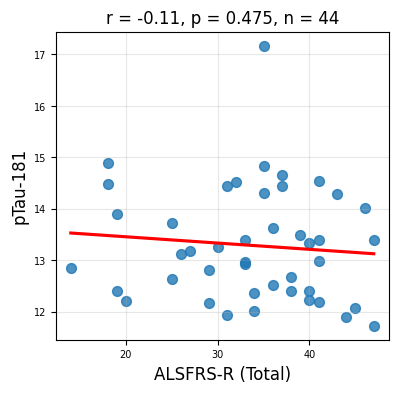

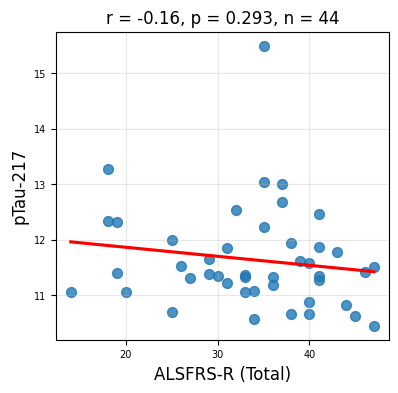

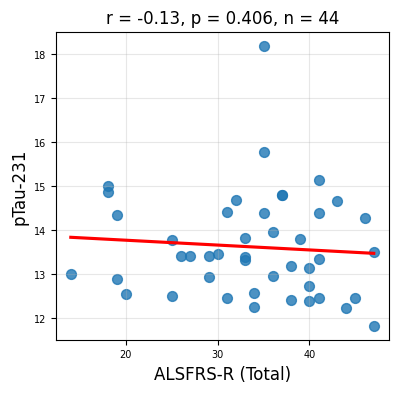

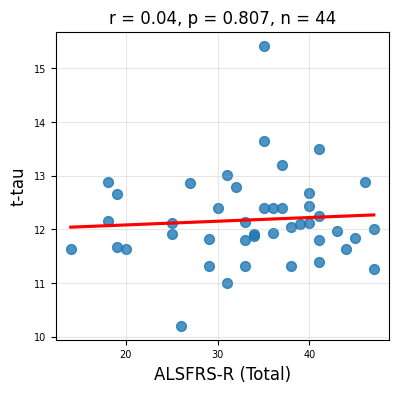

In [60]:
# ALSFRS-R vs Markers 

# Use ALSFRS-R total score if assessment was conducted within 6 weeks (42 days) of sampling
df_filtered_als = df_merged[df_merged["time_diff_days_ALSFRS"] <= 42]


# Select nine significant markers 
df = df_filtered_als[["ALSFRS-R (Total)", "Aβ38", "Aβ40",  "FABP3", "NfL", "NfH", "pTau-181", "pTau-217", "pTau-231", "t-tau"]]

# Fixed X column
x_col = "ALSFRS-R (Total)"


# Filter only numeric columns for Y (excluding the X column)
numeric_cols = df.select_dtypes(include='number').columns.drop(x_col, errors='ignore')

results = []

# Loop through numeric Y columns
for y_col in numeric_cols:
    # Drop rows with missing values for the two columns
    valid_data = df[[x_col, y_col]].dropna()
    
    # Skip if no variation
    if valid_data[y_col].nunique() < 2 or valid_data[x_col].nunique() < 2:
        print(f"Skipping {y_col}: Not enough variation")
        continue

    # Calculate Spearman correlation and confidence interval
    corr, p_value, r_lower, r_upper = calculate_spearman_ci(valid_data[x_col], valid_data[y_col])
    n = len(valid_data)
    
    # Append results
    results.append({
        'Marker': y_col,
        'Spearman_r': corr,
        'p_value': p_value,
        'CI_lower': r_lower,
        'CI_upper': r_upper,
        'Sample_size': n
    })

    # Plot scatter
    plt.figure(figsize=(4.3, 4))
    sns.regplot(x=valid_data[x_col], y=valid_data[y_col], ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
    plt.title(f"r = {corr:.2f}, p = {p_value:.3f}, n = {n}", fontsize = 12)
    plt.xlabel(x_col, fontsize =12)
    plt.ylabel(y_col, fontsize =12)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.grid(alpha=0.3)
    plt.savefig(f".\\figures\\ALSFRS_Total_vs{y_col}.tiff", dpi=300)
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
results_df

# #  export results to CSV
results_df.to_csv('alsfrs_spearman_results.csv', index=False)



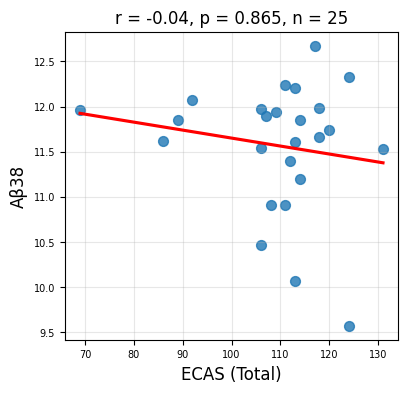

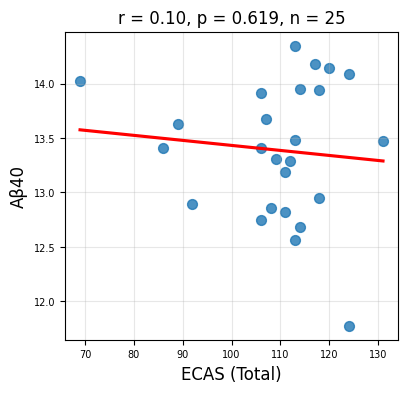

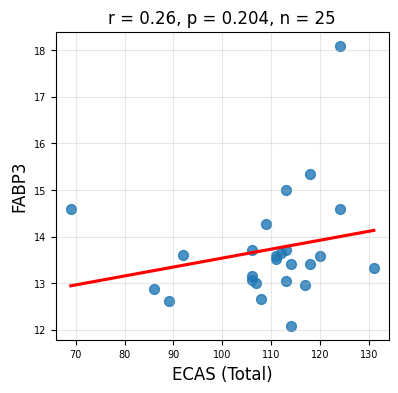

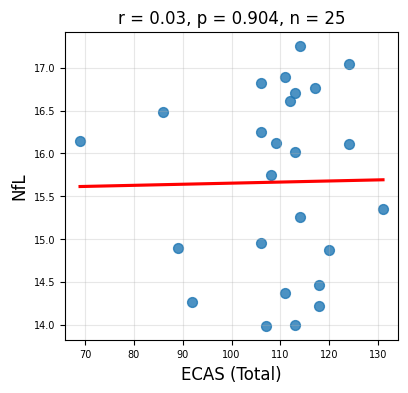

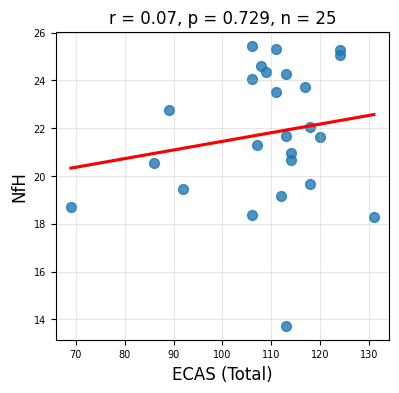

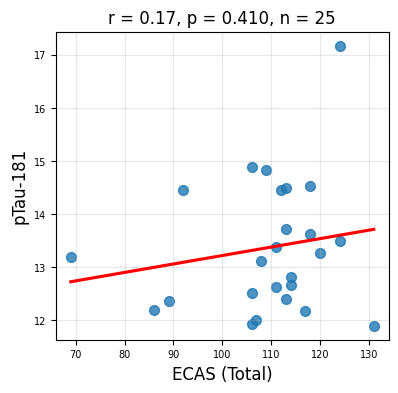

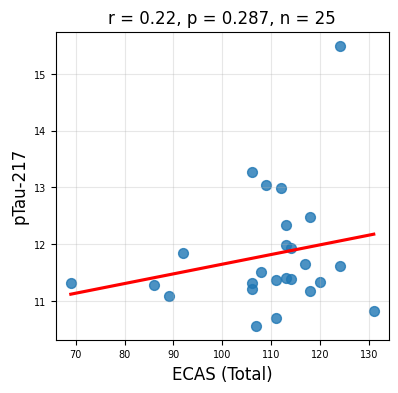

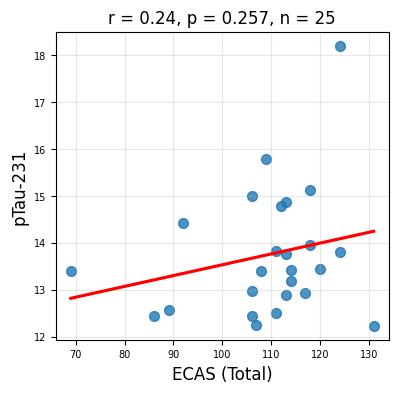

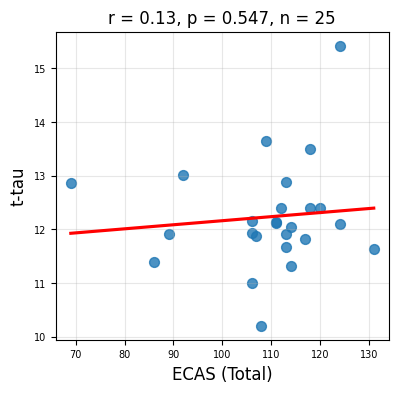

In [61]:
# ECAS Total vs Markers 

# Use ECAS total score if assessment was conducted within 6 weeks (42 days) of sampling

df_filtered_ecas = df_merged[df_merged["time_diff_days_ECAS"] <= 42]

# Select nine significant markers 
df = df_filtered_ecas[["ECAS (Total)", "Aβ38", "Aβ40",  "FABP3", "NfL", "NfH", "pTau-181", "pTau-217", "pTau-231", "t-tau"]]

# Fixed X column
x_col = "ECAS (Total)"


# Filter only numeric columns for Y (excluding the X column)
numeric_cols = df.select_dtypes(include='number').columns.drop(x_col, errors='ignore')

results = []

# Loop through numeric Y columns
for y_col in numeric_cols:
    # Drop rows with missing values for the two columns
    valid_data = df[[x_col, y_col]].dropna()
    
    # Skip if no variation
    if valid_data[y_col].nunique() < 2 or valid_data[x_col].nunique() < 2:
        print(f"Skipping {y_col}: Not enough variation")
        continue

    # Calculate Spearman correlation and confidence interval
    corr, p_value, r_lower, r_upper = calculate_spearman_ci(valid_data[x_col], valid_data[y_col])
    n = len(valid_data)
    
    # Append results
    results.append({
        'Marker': y_col,
        'Spearman_r': corr,
        'p_value': p_value,
        'CI_lower': r_lower,
        'CI_upper': r_upper,
        'Sample_size': n
    })

    # Plot scatter
    plt.figure(figsize=(4.3,4))
    sns.regplot(x=valid_data[x_col], y=valid_data[y_col], ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
    plt.title(f"r = {corr:.2f}, p = {p_value:.3f}, n = {n}", fontsize = 12)
    plt.xlabel(x_col, fontsize =12)
    plt.ylabel(y_col, fontsize =12)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.grid(alpha=0.3)
    plt.savefig(f".\\figures\\ECAS_vs{y_col}.tiff", dpi=300)
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
results_df

# #  export results to CSV
results_df.to_csv('ecas_spearman_results.csv', index=False)
